# The development in productivity and hourly wages in Denmark across industries and years.

## Introduction

The development in productivity is the underlying condition for a natural increase in wages, and therefore a substantial contributor to the overall wealth in society. This statement is something the _The Productivity Commision_ and organizations from different sites of the political spectrum (ex. _Danish Metal Workers Union_ and _Cepos_) agrees with, even though the calculations of this is used to assist different claims. 

The trends in hourly wage and hourly productivity is said to follow each other in the long run. If the increment in wage is bigger than the increment in productivity, it will be too expensive for companies to produce, and this will lead to lower production and lower employment. Rising unemployment will lead to a lower increase in overall earnings, and will at last lead to better competitiveness and therefore productivity.  

"_If wages are persistently lagging behind productivity, workers do not receive their fair share of the produced wealth. This is not only deeply unjust but also economically detrimental, as growth remains behind its potential. Labour income remains the main source of income for households and private consumption makes up the largest part of aggregate demand._" - **Bela Galgoczi** 

In this assignment, we investigate the relationship between productivity and hourly wage in Denmark. We want to investigate the relationship when we compare different industries to each other and the total trends. Some industries may  naturally have a close relationship, where other industries may have a bigger deviation between wage and productivity. 


We measure productivity and hourly wage as shown in the two following equations:   




\\[
\begin{eqnarray*}
Productivity_{ij} = \frac{Gross\:value\:added_{ij}}{Hours\:worked_{ij}}
\\
\\
Hourly\: wage_{ij} = \frac{Compensation\:of\:employees_{ij}}{Hours\:worked\:by\:employees_{ij}}
\end{eqnarray*}
\\]


where ${i}$ denotes years and ${j}$ denotes industries.

Moving on, we start by importing all the modules, we need for this notebook.

## Data managemnet

**Import of packages:** We import packages to calculate and manipulate data (_numpy_ and _pandas_) and packages to plot our results (_matplot_ and _seaborn_). Lastly, we import _pydst_ which enables the use of _Statistics Denmark_ from where we get our relevant data.

In [46]:
#Import of packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web

import datetime
import pydst
dst = pydst.Dst(lang='en')

From statistics Denmark we load data which contains _the Gross value added, the compensation of employees, the hours worked in total_ and _the hours worked by the employees_ in the different industries. More specifically we load two datasets; 

1. NABP10: A dataset containing the gross value added and compensation of employees 
2. NABB10: A dataset containing the hours worked by employees and hours worked in total

We need to merge the two datasets to one, but first, we have to check the specific datasets, their dimensions, renaming, convert strings to floats, etc.


**Imports of data:**

In [47]:
# a. gettign an orientation in data
dst.get_variables('NABP10') # command to se 'id'
dst.get_variables('NABP10').iloc[0]['values'] # command to se 'values' in 'TRANSAKT'

# b.  loading data 
gva10 = dst.get_data(table_id = 'NABP10', variables={'TRANSAKT':['B1GD','D1D'],'BRANCHE':['*'], 'PRISENHED':['V'], 'TID':['*']})
emp10 = dst.get_data(table_id = 'NABB10', variables={'SOCIO':['EMPH_DC','SALH_DC'],'BRANCHE':['*'], 'TID':['*']})
    
# c. checking the dimensions  
print(f'Industries in gva10 = {len(gva10.BRANCHE.unique())}')
print(f'Industries in emp10  = {len(emp10.BRANCHE.unique())}')

print(f'Years in gva10 = {len(gva10.TID.unique())}')
print(f'Years in emp10  = {len(emp10.TID.unique())}')

Industries in gva10 = 15
Industries in emp10  = 15
Years in gva10 = 53
Years in emp10  = 53


From table "NABP10" we do only read data in nominal prices, which is due to the fact that "Compensation of employees" is not given in chained prices. Below we have a quick look a the imported data:

In [48]:
# a. quick look at data
#gva10.head()
emp10.head()

,SOCIO,BRANCHE,TID,INDHOLD
0,"Hours worked (1,000 hours)",Total,1966,4604383
1,"Hours worked (1,000 hours)","A Agriculture, forestry and fishing",1966,663692
2,"Hours worked (1,000 hours)",B Mining and quarrying,1966,7945
3,"Hours worked (1,000 hours)",C Manufacturing,1966,1100466
4,"Hours worked (1,000 hours)",D_E Utility services,1966,29333


**Renaming variables:**

In [49]:
# a. define dictionaries to rename variables
columns_dict = {}
columns_dict['TRANSAKT']  = 'variable'
columns_dict['BRANCHE']   = 'industry'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID']       = 'year'
columns_dict['INDHOLD']   = 'value'
columns_dict['SOCIO']     = 'employment'

var_dict = {} # var is for variable
var_dict['B.1g Gross value added']                   = 'GVA'
var_dict['D.1 Compensation of employees']            = 'ComEmp'
var_dict['Hours worked (1,000 hours)']               = 'Hours_TOT'
var_dict['Hours worked for employees (1,000 hours)'] = 'Hours_Emp'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices']              = 'nominal'

industry_dict = {}
industry_dict['A Agriculture, forestry and fishing']                                 = 'Agriculture, forestry and fishing'
industry_dict['B Mining and quarrying']                                              = 'Mining and quarrying'
industry_dict['C Manufacturing']                                                     = 'Manufacturing'
industry_dict['D_E Utility services']                                                = 'Utility services' 
industry_dict['F Construction']                                                      = 'Construction'
industry_dict['G_I Trade and transport etc.']                                        = 'Trade and transport etc.'
industry_dict['J Information and communication']                                     = 'Information and communication'
industry_dict['K Financial and insurance']                                           = 'Financial and insurance'
industry_dict['LA Real estate activities and renting of non-residential buildings']  = 'Real estate activities and renting of non-residential buildings'
industry_dict['LB Dwellings']                                                        = 'Dwellings'
industry_dict['M_N Other business services']                                         = 'Other business services'
industry_dict['O_Q Public administration, education and health']                     = 'Public administration, education and health'
industry_dict['R_S Arts, entertainment and other services']                          = 'Arts, entertainment and other services'

# b. renaming
gva10.rename(columns=columns_dict,inplace=True)
emp10.rename(columns=columns_dict,inplace=True)

for key,value in var_dict.items():
    gva10.variable.replace(key,value, inplace=True)
    emp10.employment.replace(key,value, inplace=True)

for key,value in industry_dict.items():
    gva10.industry.replace(key,value, inplace=True)
    emp10.industry.replace(key,value, inplace=True)

for key,value in unit_dict.items():
    gva10.unit.replace(key,value, inplace=True)

# c. redefine value from 'str' to 'float'
emp10.value = emp10.value.astype('float')
gva10['value'] = gva10['value'].apply(pd.to_numeric, errors='coerce')

#gva10.head()
emp10.tail()

,employment,industry,year,value
1585,Hours_Emp,Dwellings,2018,23643.0
1586,Hours_Emp,Of which: General government,2018,1098948.0
1587,Hours_Emp,Other business services,2018,418899.0
1588,Hours_Emp,"Public administration, education and health",2018,1180144.0
1589,Hours_Emp,"Arts, entertainment and other services",2018,160466.0


**Split:**

If we merge our dataset, we will get a long dataset in which our values would be in rows, and we would like to have them in columns. We are aware of the fact that there may be an operation converting a dataset from long to wide. But due to the lack of skills, we do it the simple way. We split our two datasets into four, and merge our relevant values together.

In [50]:
# a. split dataframe emp10 in two - hours total and hours for employees.
H_TOT = emp10.loc[emp10.employment == ('Hours_TOT')]
H_TOT.rename(columns = {'value':'H_TOT'}, inplace=True)

H_Emp = emp10.loc[emp10.employment == ('Hours_Emp')]
H_Emp.rename(columns = {'value':'H_EMP'}, inplace=True)

# b. split dataframe gva10 in two - GVA and compensation for employees 
GVA = gva10.loc[gva10.variable == ('GVA')]
GVA.rename(columns = {'value':'GVA'}, inplace=True)

ComEmp = gva10.loc[gva10.variable == ('ComEmp')]
ComEmp.rename(columns = {'value':'ComEmp'}, inplace=True)

#GVA.head()
H_TOT.head()

,employment,industry,year,H_TOT
0,Hours_TOT,Total,1966,4604383.0
1,Hours_TOT,"Agriculture, forestry and fishing",1966,663692.0
2,Hours_TOT,Mining and quarrying,1966,7945.0
3,Hours_TOT,Manufacturing,1966,1100466.0
4,Hours_TOT,Utility services,1966,29333.0


In [51]:
#skip_or_not = ['employment','variable']
#if columns   
# pass command if already ran!!!!!!!!!!!!!!!!

# dropper 'employment' and 'variable'
H_TOT.drop(columns=['employment'], inplace = True)
H_Emp.drop(columns=['employment'], inplace = True)
GVA.drop(columns=['variable'], inplace = True)
ComEmp.drop(columns=['variable'], inplace = True)


In [52]:
H_TOT.head()

,industry,year,H_TOT
0,Total,1966,4604383.0
1,"Agriculture, forestry and fishing",1966,663692.0
2,Mining and quarrying,1966,7945.0
3,Manufacturing,1966,1100466.0
4,Utility services,1966,29333.0


**Merge:**

Finally we merge our data, sorted on year and industry. Doing it this way, we can calculate the productivity and hourly wage, in a way where we can compare the relationship over time in the different industries.

In [60]:
# a. merged data
merged = pd.merge(GVA,ComEmp,how='left',on=['year','industry'])
merged1 = pd.merge(merged,H_TOT,how='left',on=['year','industry'])
df = pd.merge(merged1,H_Emp,how='left',on=['year','industry'])
df.drop(columns=['unit_y'], inplace = True)

# b. redefine value from 'str' to 'float'
df.GVA = df.GVA.astype('float')
df.ComEmp = df.ComEmp.astype('float')
df

# c. calculate the productivity and the hourly wage given the equations from the introduction. 
# We multipy with 1000 since GVA and ComEmp is measured as millions while H_TOT and H_EMP is measured as thousand. 
df['Productivity'] = df.GVA / df.H_TOT*1000
df['Hour_wage'] = df.ComEmp / df.H_EMP*1000

# d. checking the dimensions the 
print(f'Years in main dataset "df_index" = {len(df.year.unique())}')
print(f'Industries in main dataset "df_index" = {len(df.industry.unique())}')  

df.head()

Years in main dataset "df_index" = 53
Industries in main dataset "df_index" = 15


,industry,unit_x,year,GVA,ComEmp,H_TOT,H_EMP,Productivity,Hour_wage
0,Total,nominal,1982,438077.0,263929.0,3861797.0,3284732.0,113.438640,80.350239
1,"Agriculture, forestry and fishing",nominal,1982,23420.0,3807.0,333573.0,101920.0,70.209519,37.352826
2,Mining and quarrying,nominal,1982,3871.0,900.0,9130.0,8663.0,423.986857,103.890107
3,Manufacturing,nominal,1982,76773.0,50788.0,688864.0,651143.0,111.448704,77.998228
4,Utility services,nominal,1982,9757.0,2774.0,29954.0,29453.0,325.732790,94.183954


We now have the dataset in the shape we want. We can see that the dimensions are the same as from the beginning - which implies that we did not lose any observations through the data manipulation. 

**Index:**

We see that the values of the industries are very different in hourly wage and productivity. This makes sense since the wage-level and productivity in the industries differ. We want to compare the relationship between the industries over time - therefore we normalize the values. We normlize with respect to year 2010. 

In [74]:
# a. Create a copy
df_index = df.copy()
df_index.sort_values(['industry','year'], inplace=True)

# b. Normalizing by 2010 
df_index['Pro_index'] = df_index.groupby(['industry'])['Productivity'].transform(lambda x: x/x.iloc[44]*100)
df_index['H_index'] = df_index.groupby(['industry'])['Hour_wage'].transform(lambda x: x/x.iloc[44]*100)

# c. Creat a diff-variable, which takes the different between the productivity and the hourly wage
df_index['Diff'] = df_index['Pro_index'] - df_index['H_index']

# d. view the index. 
# df_index.tail(62)  #following command show that the index start over again for each industry 
df_index.tail(10)

,industry,unit_x,year,GVA,ComEmp,H_TOT,H_EMP,Productivity,Hour_wage,Pro_index,H_index,Diff
124,Utility services,nominal,2009,34713.0,10565.0,38951.0,38290.0,891.196632,275.920606,77.421619,97.120426,-19.698807
154,Utility services,nominal,2010,41459.0,10041.0,36017.0,35343.0,1151.095316,284.101519,100.000000,100.000000,0.000000
169,Utility services,nominal,2011,39893.0,9966.0,35296.0,34541.0,1130.241387,288.526678,98.188340,101.557598,-3.369257
214,Utility services,nominal,2012,38690.0,10324.0,35595.0,34875.0,1086.950414,296.028674,94.427490,104.198202,-9.770712
394,Utility services,nominal,2013,36791.0,9867.0,33335.0,32501.0,1103.674816,303.590659,95.880402,106.859921,-10.979519
409,Utility services,nominal,2014,39019.0,10528.0,34779.0,33927.0,1121.912648,310.313320,97.464791,109.226209,-11.761418
259,Utility services,nominal,2015,43375.0,10426.0,33948.0,32429.0,1277.689407,321.502359,110.997707,113.164604,-2.166897
334,Utility services,nominal,2016,44482.0,11032.0,35296.0,34256.0,1260.256120,322.045773,109.483212,113.355878,-3.872667
349,Utility services,nominal,2017,43700.0,10677.0,35291.0,34382.0,1238.276048,310.540399,107.573720,109.306138,-1.732418
784,Utility services,nominal,2018,44995.0,10840.0,34900.0,33979.0,1289.255014,319.020572,112.002455,112.291047,-0.288592


## Plots


To follow up on the results, we plot the trends of productivity and hourly wage in the industries. First, we tried to plot all in one graph, but since the category of industries is quite big, "one graph to fit them all" will look messy. Based on that experience, we make use of ``Seaborn FacedGrid``, where we plot each industry in a separate graph.

The yellow graph plots the productivity.
The magenta graph plots the hourly wage.


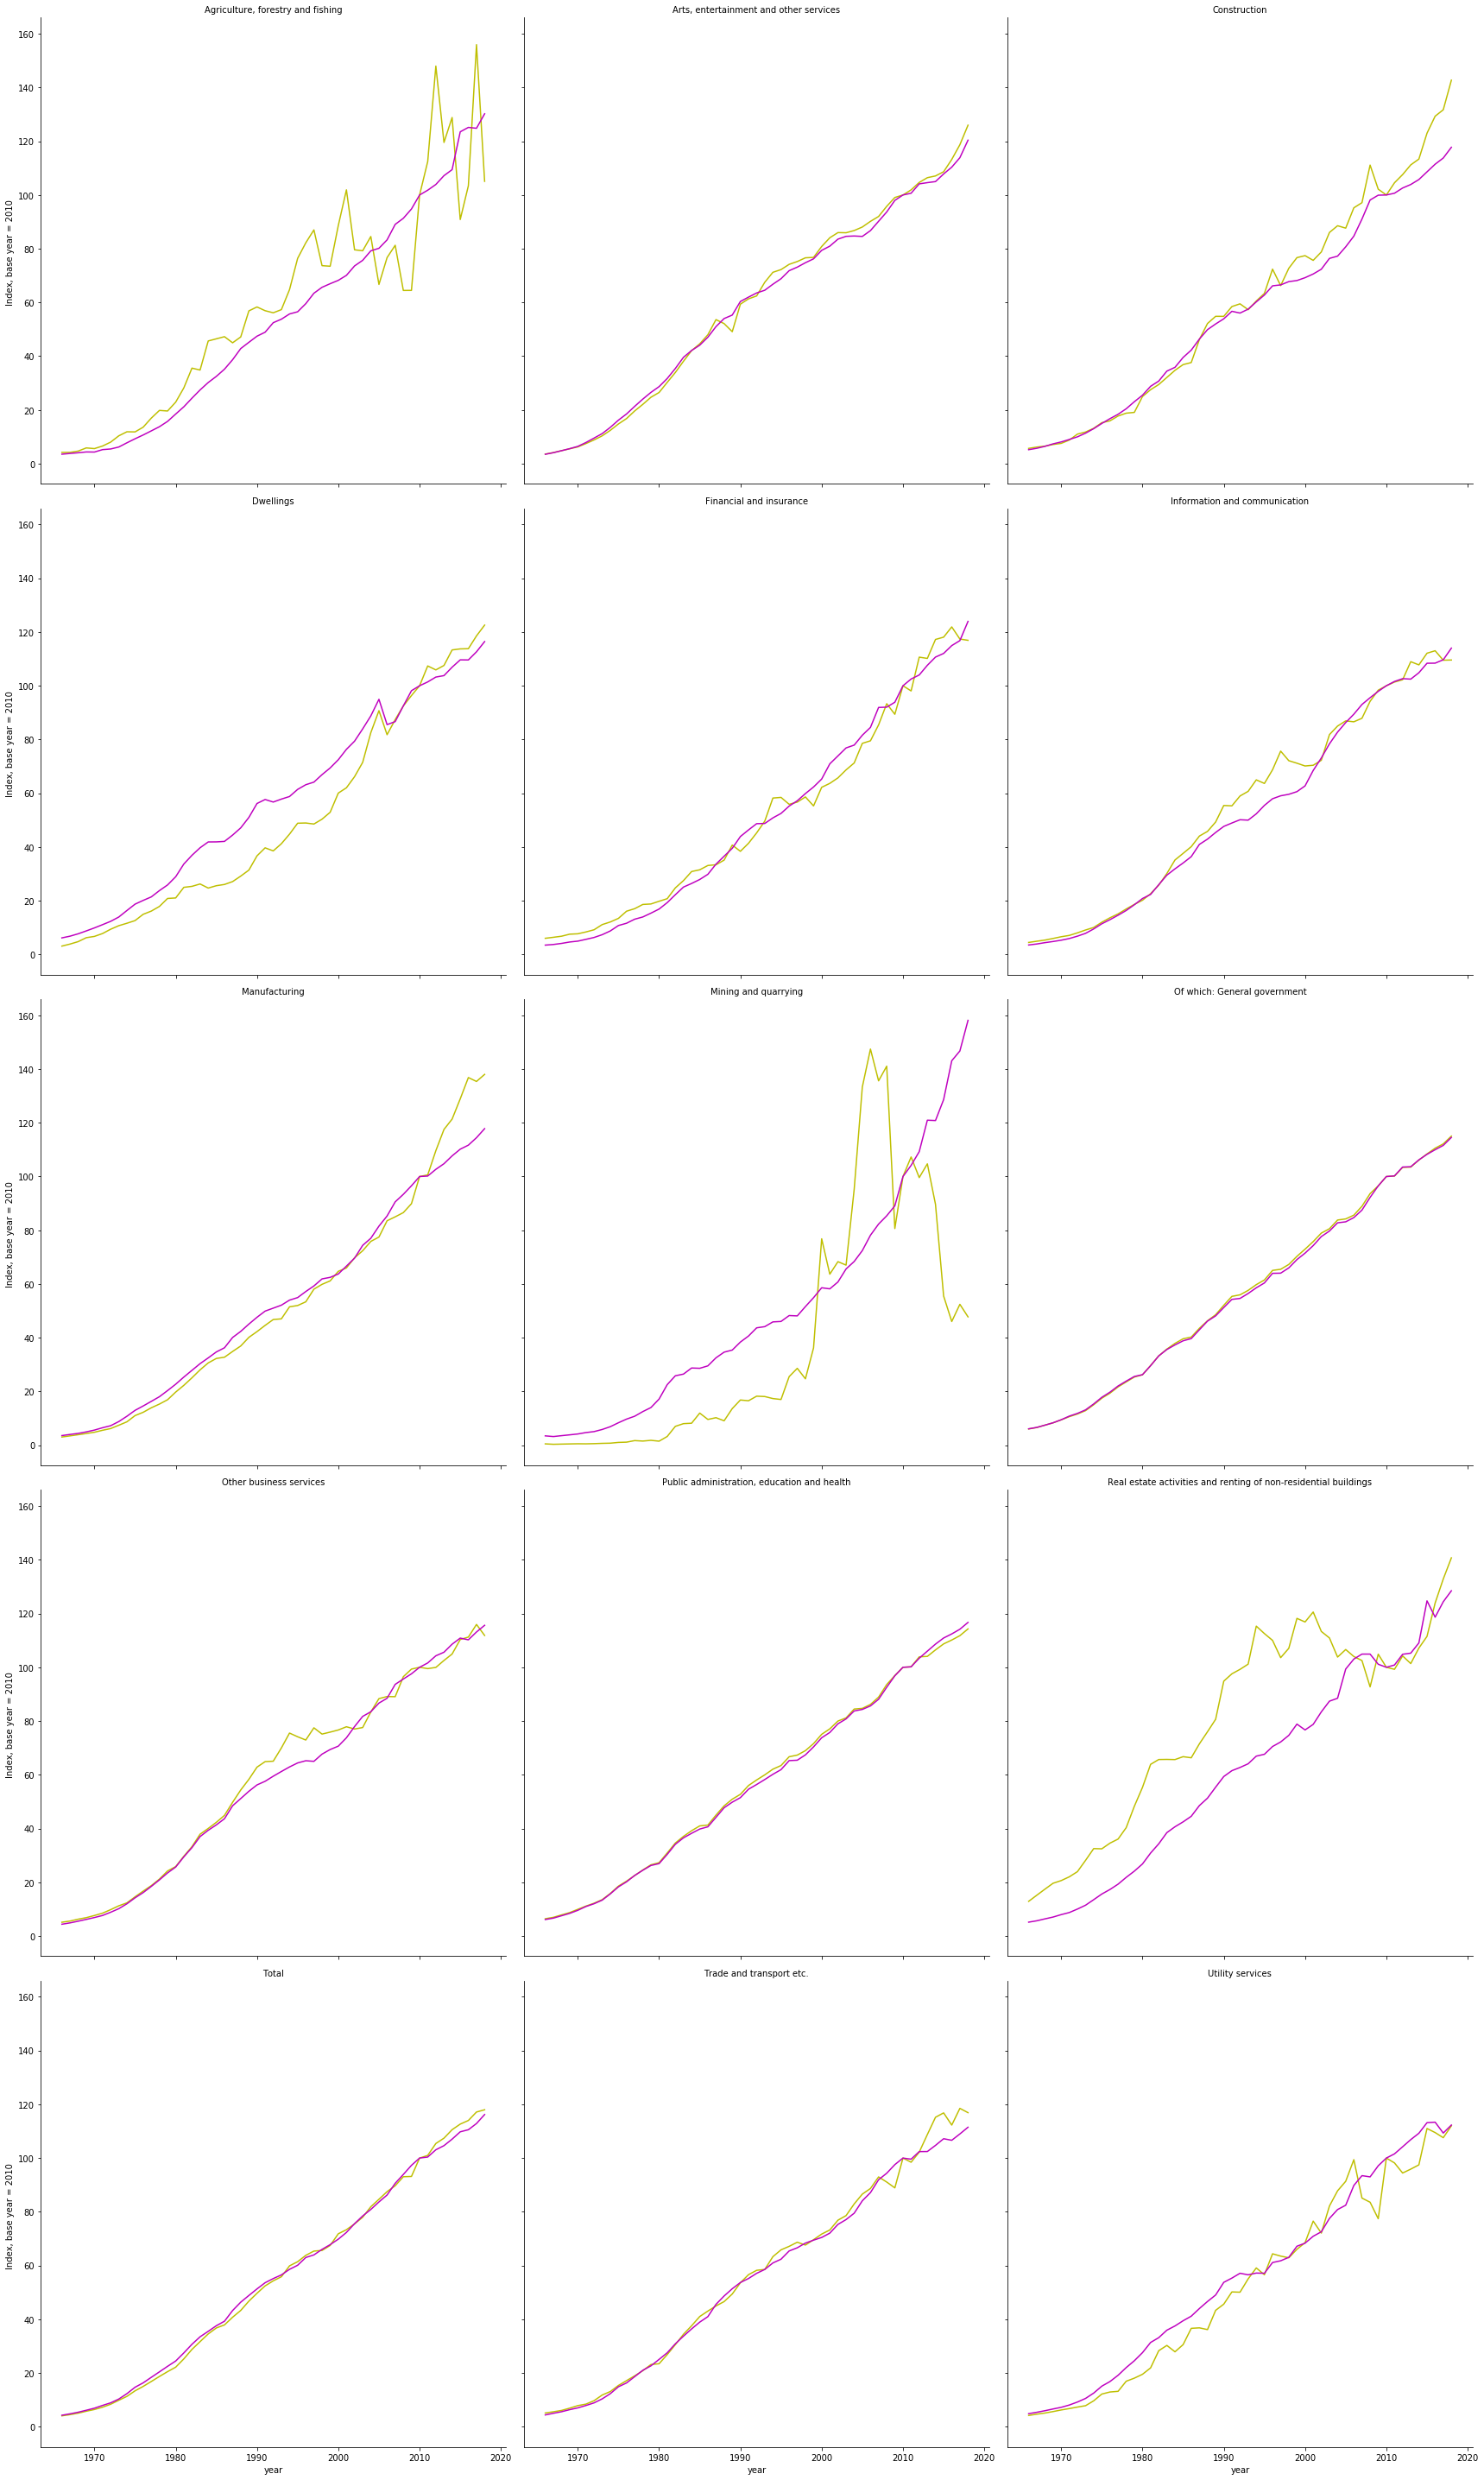

In [72]:
by_var = 'industry'
y_var  = 'year'

g = sns.FacetGrid(df_index, col=by_var, hue=by_var, col_wrap=3, sharex=True, sharey=True, height=8, aspect=1)
g = (g.map(plt.plot, 'year', 'Pro_index', color='y')) # draw the upper line 
g = (g.map(plt.plot, 'year', 'H_index', color='m')) # draw the upper line 
g = g.set_titles("{col_name}") # # Control the title of each facet
g = g.set_ylabels('Index, base year = 2010 ')

print(f'The yellow graph plots the productivity.')
print(f'The magenta graph plots the hourly wage.')

As we see, trends of productivity and hourly wage in total seem to follow each other, where agriculture, mining, and utility services seem to bump a bit in productivity over the years. If we plot the difference of the productivity and hourly wage, we get a more simple look on the development. It becomes easier to evaluate if some industries has get paid to much or to little over the years. Remember that the diff-values is $Productivity\:Index - Hourly\:wage\:Index$. So if the trend is above zero, the increase in hourly wage is behind the increase in productivity - meaning that the employees should try to negotiate for a higher wage. 

Below, we illustrate the diff-values in a dropdown-graph. It is possible to make a comparison between an industry, chosen in the dropdown menu, with the development in the economy as a whole (Total).

In [347]:
# Set 'industry' as index in a new DataFrame
df_widget = df_index.copy()
df_widget = df_widget.set_index('industry')
df_widget = df_widget[['year','Diff']]

In [356]:
# a. define the function which plot the graph
def _plot_timeseries(dataframe, industry):
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    # comparisons with 'Total'
    x_total = dataframe.loc['Total', 'year']
    y_total = dataframe.loc['Total', 'Diff']    
    
    # unique industry
    x = dataframe.loc[industry, 'year']
    y = dataframe.loc[industry, 'Diff']   
    
    ax.set(xlabel='Years', ylabel='Diff', title='Comparisons of a unique industry with Total' )
    ax.plot(x,y, label = industry)
    ax.plot(x_total,y_total, label = 'Total')
    ax.grid()
    plt.legend(bbox_to_anchor=(0.5, -0.3), loc=8, ncol=4)


# b. define a function which easy fill-out the abow function and include the dropdown menu. 
def plot_timeseries(dataframe):
    
    widgets.interact(_plot_timeseries,
    dataframe = widgets.fixed(dataframe),
    industry = widgets.Dropdown(
        #index=dataframe.loc[value],
        description='Industry', 
        options= dataframe.index.unique(), 
        value='Manufacturing',
        disabled=False)                
); 
plot_timeseries(df_lol)

interactive(children=(Dropdown(description='Industry', index=6, options=('Agriculture, forestry and fishing', …

Inspection of different plots; The hourly wage in the industries - 'Contruction' and 'Manufacturing', does not correspond with the increase in the productivity the past couple of years. Differently, the 'Agricultural, Fishing and forestry' sector, seems to have a volatile realtionship which may be due to the fact that these industries depends highly on the volatility in the seasons.  
In the industries - 'Information and communication' and 'Utility services' - does the productivity lags behind the wages. 
If one takes a look on the difference between productivity and hourly wage in _'the general goverment'_ sector, we see that it is nearly zero all time. This makes sence since it is hard to measure the gross value added, and because of the dynamic wage-process in this sector due to the "Reguleringsordningen". 


**Conclusion**

We can therefore conclude, that the overall trends of productivity and hourly wage follows each other. Employees in the 'Manufacturing' and 'Construction' industries, should negotiate for a higher hourly wage, whereas the sector of 'Information and communication' should aim for a higher productivity. 